In [24]:
import get_covid_data 
import geopandas as gpd
import matplotlib.pyplot as plt
import re
import pandas as pd

import importlib.resources as pkg_resources
from . import templates 


def plot_geographical(covid_df,metric):
    """Creates a chloropleth map showing the number 
       of covid cases or other metric in each province of Canada

    Parameters
    ----------
    covid_df : pd.core.frame.DataFrame
        Pandas dataframe containing covid data to plot.

    metric : str
        column in the dataframe to plot 

    Returns
    -------
    plot : matplotlib.figure
        Cloropleth map of Covid metric numbers

    Examples
    --------
    >>> plot_geographical(covid_df,'cases')
    """

    if type(metric) != str:
        raise Exception("The value of the argument 'metric' must be of type string")

    if type(covid_df) != pd.DataFrame:
        raise Exception("The value of the argument 'covid_df' must be of type dataframe.")

    if metric not in covid_df.columns:
        raise ValueError(f"Chosen metric must be a column in the dataframe.\nPlease choose one from: {list(covid_df.columns)}")

    if re.match(r'^date', metric) or re.match(r'^province', metric) :
        raise ValueError("Chosen metric must not be date or province column.")

    if metric == 'testing_info':
        raise ValueError("Please choose a different metric with non null values.")

    # read in and tidy geodataframe containing Canada geography data
    with pkg_resources.path(templates, 'lpr_000b16a_e.shp') as fp:
        map_df = gpd.read_file(fp)[['PRENAME','geometry']]
        
        
    map_df = gpd.read_file(fp)[['PRENAME','geometry']]
    map_df = map_df.replace({'PRENAME' : {'Newfoundland and Labrador' : 'NL', 'Prince Edward Island' : 'PEI', 'British Columbia' : 'BC' ,'Northwest Territories' :'NWT'}})

    # data wranging if cumulative metric is chosen
    if re.match(r'^cumulative', metric):
        for met in list(covid_df.columns): # find date column 
            if met.startswith('date'):
                date_metric = met
                break

        covid_df[date_metric] = pd.to_datetime(covid_df[date_metric]) # convert date column to datetime
        covid_df=covid_df[(covid_df[date_metric] == covid_df[date_metric].max())] # filter for most recent date
        merged = map_df.set_index('PRENAME').join(covid_df.set_index('province'))

    # data wrangling for non cumulative columns
    else:
        covid_df = covid_df.groupby('province').sum()
        merged = map_df.set_index('PRENAME').join(covid_df)

    # Plot Cloropleth map
    fig, ax = plt.subplots(1, figsize=(10, 6))
    
    plt.close()
    merged.plot(column=metric, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')
    ax.axis('off')

    vmin = merged[metric].min()
    vmax = merged[metric].max()

    sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
    sm._A = []
    cbar = fig.colorbar(sm)
    cbar.set_label(f'Number of {metric.capitalize().replace("_", " ")}',labelpad=20)

    ax.set_title(f'Covid Numbers Across Canada: {metric.capitalize().replace("_", " ")}', fontdict={'fontsize': '15', 'fontweight' : '3'})

    return fig 


ImportError: attempted relative import with no known parent package

In [19]:
import get_covid_data
import plot_geographical
covid_df = get_covid_data.get_covid_data()
covid_df.to_csv('covid_df.csv',index=False)

plot = plot_geographical(covid_df,'cumulative_cases')

ModuleNotFoundError: No module named 'CovidTracker.get_covid_data'; 'CovidTracker' is not a package

In [ ]:
plot
plt.savefig("map.png")

In [282]:
<AxesSubplot:label='<colorbar>', ylabel='Number of Cases'> in plot.axes

SyntaxError: invalid syntax (2525468451.py, line 1)

In [303]:
plot.

AttributeError: 'Figure' object has no attribute 'title'

In [300]:
assert hasattr(plot,"axes")

In [8]:
import get_covid_data
df = get_covid_data.get_covid_data()
df['date_report'] = pd.to_datetime(df['date_report'], format='%d-%m-%Y')
max_date = df.loc[df['date_report'].argmax(), 'date_report']
columns = ['date_report', 'province'] + list(set(df.columns) - set(['date_report', 'province']))
summary = df[df['date_report'] == max_date][columns].sort_values('province')
summary

,date_report,province,cases,cumulative_cases
726,2022-01-20,Alberta,3527,463024
1453,2022-01-20,BC,2150,305715
2180,2022-01-20,Manitoba,850,113196
3634,2022-01-20,NL,362,14065
5815,2022-01-20,NWT,136,4508
2907,2022-01-20,New Brunswick,488,24489
4361,2022-01-20,Nova Scotia,696,33083
5088,2022-01-20,Nunavut,0,1242
6542,2022-01-20,Ontario,6630,990636
7269,2022-01-20,PEI,249,5361


In [211]:
if re.match(r'^cumulative', metric):
    for metric in list(covid_df.columns): # find date column 
        if metric.startswith('date'):
            date_metric = metric 
            break
date_metric
covid_df[date_metric] = pd.to_datetime(covid_df[date_metric])
covid_df=covid_df[(covid_df[date_metric] == covid_df[date_metric].max())]
merged = map_df.set_index('PRENAME').join(covid_df.set_index('province'))

C:\Users\Jessie\AppData\Local\Temp\ipykernel_2128\624828811.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_df[date_metric] = pd.to_datetime(covid_df[date_metric])


In [314]:
import git 
git_repo = git.Repo('CovidTracker/Resources/Chloropleth_Shape_Files/lpr_000b16a_e.shp', search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")
git_root
fp = "/Resources/Chloropleth_Shape_Files/lpr_000b16a_e.shp"

NoSuchPathError: C:\Users\Jessie\DSCI524\CovidTracker\src\CovidTracker\CovidTracker\Resources\Chloropleth_Shape_Files\lpr_000b16a_e.shp

In [336]:
git_repo = git.Repo('.', search_parent_directories=True)
git_root = git_repo.git.rev_parse("--show-toplevel")
fp = git_root + ("/Resources/Chloropleth_Shape_Files/lpr_000b16a_e.shp")

In [335]:
print(__file__)

NameError: name '__file__' is not defined

In [331]:
import os
os.path.dirname(os.path.abspath('lpr_000b16a_e.shp'))
os.path.join(os.path.dirname(__file__), 'lpr_000b16a_e.shp')

'C:\\Users\\Jessie\\DSCI524\\CovidTracker\\src\\CovidTracker'

In [337]:
map_df = gpd.read_file(fp)[['PRENAME','geometry']]
map_df

,PRENAME,geometry
0,Newfoundland and Labrador,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,Prince Edward Island,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,British Columbia,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [171]:

map_df = map_df.replace({'PRENAME' : { 'Newfoundland and Labrador' : 'NL', 'Prince Edward Island' : 'PEI', 'British Columbia' : 'BC' ,'Northwest Territories' :'NWT'}})
map_df

,PRENAME,geometry
0,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,PEI,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,BC,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [183]:
metric = 'mortality'
df = get_covid_data.get_covid_data('mortality')
# df['date_report'] = pd.to_datetime(df['date_report'])
df

# merged = map_df.set_index('PRENAME').join(df)
# vmin = merged[metric].min()
# vmax = merged[metric].max()

# vmin,vmax
# merged
# df['province'].unique()

,cumulative_deaths,date_death_report,deaths,province
0,0,08-03-2020,0,Alberta
1,0,09-03-2020,0,Alberta
2,0,10-03-2020,0,Alberta
3,0,11-03-2020,0,Alberta
4,0,12-03-2020,0,Alberta
...,...,...,...,...
9543,15,14-01-2022,0,Yukon
9544,15,15-01-2022,0,Yukon
9545,15,16-01-2022,0,Yukon
9546,15,17-01-2022,0,Yukon


In [181]:
map_df

,PRENAME,geometry
0,NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83083..."
1,PEI,"MULTIPOLYGON (((8435711.754 1679935.966, 84358..."
2,Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84710..."
3,New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81762..."
4,Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005..."
5,Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63787..."
6,Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396..."
7,Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5249285.640..."
8,Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463..."
9,BC,"MULTIPOLYGON (((4018904.414 3410247.271, 40194..."


In [184]:
map_df.set_index('PRENAME').join(df.set_index('province'))

,geometry,cumulative_deaths,date_death_report,deaths
Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463...",0,08-03-2020,0
Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463...",0,09-03-2020,0
Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463...",0,10-03-2020,0
Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463...",0,11-03-2020,0
Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463...",0,12-03-2020,0
...,...,...,...,...
Yukon,"MULTIPOLYGON (((4593284.320 4180399.606, 45933...",15,14-01-2022,0
Yukon,"MULTIPOLYGON (((4593284.320 4180399.606, 45933...",15,15-01-2022,0
Yukon,"MULTIPOLYGON (((4593284.320 4180399.606, 45933...",15,16-01-2022,0
Yukon,"MULTIPOLYGON (((4593284.320 4180399.606, 45933...",15,17-01-2022,0


In [110]:
df = get_covid_data.get_covid_data('cases')
words = list(df.columns)

for metric in list(df.columns):
    if metric.startswith('date'):
        date_metric = metric
        break
date_metric

'date_report'

In [134]:
df[(df['date_report'] == today())]


NameError: name 'today' is not defined

In [116]:
df['date_report'] = pd.to_datetime(df['date_report'] )
df['date_report'] 
df['date_report'].max()
df=df[(df['date_report'] == df['date_report'].max())]

df['date_report'].max()


C:\Users\Jessie\AppData\Local\Temp\ipykernel_2128\2832830641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_report'] = pd.to_datetime(df['date_report'] )


Timestamp('2022-12-01 00:00:00')

In [29]:
import get_covid_data
data = get_covid_data.get_covid_data()[['cases','province']].groupby('province').sum()

data

,cases
province,
Alberta,452381
BC,299146
Manitoba,110593
NL,12893
NWT,4055
New Brunswick,23173
Nova Scotia,31445
Nunavut,1195
Ontario,968292


In [30]:
merged = map_df.set_index('PRENAME').join(data)
merged

,geometry,cases
PRENAME,,
NL,"MULTIPOLYGON (((8307365.589 2582136.711, 83083...",12893
PEI,"MULTIPOLYGON (((8435711.754 1679935.966, 84358...",4401
Nova Scotia,"MULTIPOLYGON (((8470851.646 1624745.011, 84710...",31445
New Brunswick,"MULTIPOLYGON (((8176224.537 1722553.460, 81762...",23173
Quebec,"MULTIPOLYGON (((8399709.494 2261445.703, 84005...",801153
Ontario,"MULTIPOLYGON (((6378815.614 2295412.440, 63787...",968292
Manitoba,"MULTIPOLYGON (((6039656.509 2636304.343, 60396...",110593
Saskatchewan,"POLYGON ((5248633.914 2767057.263, 5249285.640...",101537
Alberta,"POLYGON ((5228304.177 2767597.891, 5228098.463...",452381


In [58]:
variable = 'cases'
merged[variable].min()
variable.capitalize()

'Cases'

Text(0.5, 1.0, 'Canada Covid Cases')

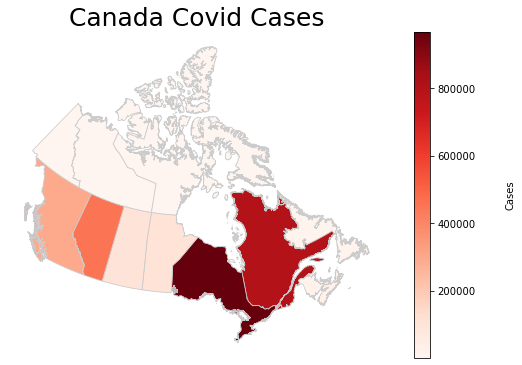

In [153]:
variable = 'cases'
fig, ax = plt.subplots(1, figsize=(10, 6))

merged.plot(column=variable, cmap='Reds', linewidth=0.8, ax=ax, edgecolor='0.8')#,legend=True,label = 'Cases')
ax.axis('off')

vmin = merged[variable].min()
vmax = merged[variable].max()

sm = plt.cm.ScalarMappable(cmap='Reds', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
cbar.set_label(f'{variable.capitalize()}',labelpad=30)

ax.set_title(f'Canada Covid {variable.capitalize()}', fontdict={'fontsize': '25', 'fontweight' : '3'})


In [154]:
plot

<AxesSubplot:title={'center':'Canada Covid Cases'}>

(<Figure size 720x432 with 1 Axes>, <AxesSubplot:>)

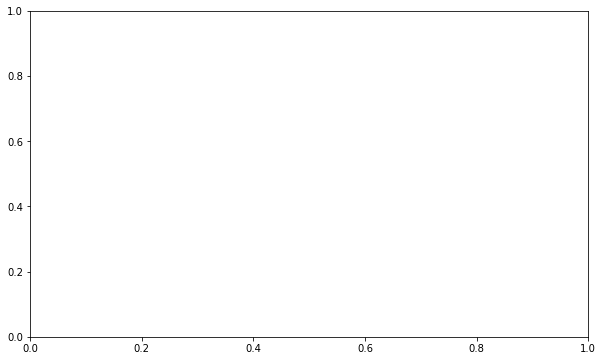

In [152]:
plt.subplots(1, figsize=(10, 6))

In [19]:

try:
    import importlib.resources as pkg_resources
except ImportError:
    # Try backported to PY<37 `importlib_resources`.
    import importlib_resources as pkg_resources

# from . import Resources  # relative-import the *package* containing the templates

template = pkg_resources.read_text(__package__, 'temp_file')
# or for a file-like stream:
template = pkg_resources.open_text(templates, 'temp_file')





AttributeError: 'NoneType' object has no attribute 'startswith'

In [8]:
import get_covid_data 
import pandas as pd
from datetime import datetime, timedelta
import altair as alt
import re

def plot_ts(df, metric, start=None, end=None):
    """Creates a plot displaying the number of 
       covid cases over time.
       
    Parameters
    ----------
    df : pd.DataFrame
        Pandas dataframe containing covid data to plot.
        
    metric : str
        A column chosen from the dataframe to plot in time order
        
    start : datetime, optional
        The beginning date of the time series plot. 
        Format needs to be: YYYY-MM-DD
        
    end : datetime, optional
        The ending date of the time series plot
        Format needs to be: YYYY-MM-DD
        
    Returns
    ----------
    Plot object
    
    Examples
    ----------
    >>> plot_ts(covid_df, "active_cases")
    """
    alt.data_transformers.disable_max_rows()
    
    if type(metric) != str:
        raise Exception("The input of the parameter 'metric' should be a string")

    if type(df) != pd.DataFrame:
        raise Exception("The input of the parameter 'df' should be a dataframe.")

    if metric not in df.columns:
        raise ValueError(f"Cannot find the chosen metric. Please choose one from: {list(df.columns)}")

    if ('date' in metric) or ('province' in metric):
        raise ValueError("Chosen metric must not be date or province.")
    
    if metric == 'testing_info':
        raise ValueError("This column is not available for plotting, please choose another column.")
    
    # Find and convert the date column
    for i in df.columns:
        if 'date' in i:
            date_col = i    
    df[date_col] = pd.to_datetime(df[date_col], format = '%d-%m-%Y')
    
    if (start is not None) and (end is not None):
        if pd.to_datetime(start, format = '%Y-%m-%d') >= pd.to_datetime(end, format = '%Y-%m-%d'):
            raise ValueError("The start date must be before the ending date.")
    else:
        if start is None:
            start = min(df[date_col])
        else:
            if type(start) != str:
                raise Exception("The input of the parameter 'start' should be a string")
            else:
                if not re.match(r'^\d{4}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$', start):
                    raise ValueError("Input date must follow YYYY-MM-DD format")
                else:
                    start = pd.to_datetime(start, format = '%Y-%m-%d')
                    if start < min(df[date_col]):
                        raise ValueError(f"The start date must not be before {min(df[date_col])}.")

        if end is None:
            end = max(df[date_col])
        else:
            if type(end) != str:
                raise Exception("The input of the parameter 'end' should be a string")
            else:
                if not re.match(r'^\d{4}-(0[1-9]|1[0-2])-(0[1-9]|[12][0-9]|3[01])$', end):
                    raise ValueError("Input date must follow YYYY-MM-DD format")
                else:
                    end = pd.to_datetime(end, format = '%Y-%m-%d')
                    if end > max(df[date_col]):
                        raise ValueError(f"The ending date must not be after {max(df[date_col])}.")

    df = df[(df[date_col] >= start) & (df[date_col] <= end)]
    
    plot = alt.Chart(df).mark_line().encode(
        x=alt.X(date_col+ ':T', title='Date', axis=alt.Axis(format='%Y-%b-%e')),
        y = metric
    ).properties(
        height=500, width = 1000
    )
    
    return plot

In [9]:
covid_df = get_covid_data.get_covid_data("active")

In [10]:
plot_ts(covid_df, "active_cases")

alt.Chart(...)

In [23]:
import get_covid_data
import plot_geographical
from CovidTracker.plot_time_series import plot_ts
from CovidTracker.calculate_stat_summary import calculate_stat_summary

ModuleNotFoundError: No module named 'CovidTracker.get_covid_data'; 'CovidTracker' is not a package